# Import tools for data analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import numpy as np
from geopy.geocoders import Nominatim

# Get dataset of hotels in Turkey from expedia.com

In [41]:
df = pd.read_csv("expedia_dataset2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           798 non-null    object 
 1   overall_rating       794 non-null    object 
 2   total_review         798 non-null    object 
 3   location             798 non-null    object 
 4   cleanliness_rating   798 non-null    object 
 5   service_rating       798 non-null    object 
 6   amenities_rating     798 non-null    object 
 7   facilities_rating    798 non-null    object 
 8   total_photo          798 non-null    object 
 9   room_rating          674 non-null    object 
 10  room_size            758 non-null    object 
 11  number_of_amenities  787 non-null    float64
 12  price                762 non-null    object 
dtypes: float64(1), object(12)
memory usage: 81.2+ KB


# Get the location dataset 

In [42]:
loc = pd.read_csv("dataset/expedia_hotel_locations.csv")
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hotel_name          804 non-null    object
 1   longitude_latitude  804 non-null    object
dtypes: object(2)
memory usage: 12.7+ KB


In [43]:
df.drop_duplicates(subset = "hotel_name", inplace = True)
loc.drop_duplicates(subset = "hotel_name", inplace = True)

In [44]:
loc["longitude_latitude"] = loc["longitude_latitude"].apply(lambda x: x.split("%7C")[1])
loc["longitude_latitude"] = loc["longitude_latitude"].apply(lambda x: x.split("&key")[0])
loc["latitude"] = loc["longitude_latitude"].apply(lambda x: float(x.split(",")[0]))
loc["longitude"]  = loc["longitude_latitude"].apply(lambda x: float(x.split(",")[1]))

In [45]:
loc.drop(["longitude_latitude"], axis = 1, inplace = True)

In [46]:
df = pd.merge(df, loc, how='left', on=['hotel_name'])

In [47]:
df.head()

,hotel_name,overall_rating,total_review,location,cleanliness_rating,service_rating,amenities_rating,facilities_rating,total_photo,room_rating,room_size,number_of_amenities,price,latitude,longitude
0,Mersin HiltonSA,4.2/5,535 reviews,"Palmiye Mah. 1225 Sok. No:1, Mersin, Mersin",4.3/5,4.3/5,4.1/5,4.0/5,154+,4.1/5 guest room rating,237 sq ft,14.0,$72,36.783084,34.612662
1,Hampton by Hilton Bursa,4.4/5,564 reviews,"Istanbul Caddesi No:349, Bursa, Bursa",4.5/5,4.3/5,4.4/5,4.4/5,50+,4.5/5 guest room rating,258 sq ft,10.0,$53,40.227918,29.062259
2,The Land of Legends Kingdom Hotel,4.5/5,152 reviews,"Kadriye Mah Ataturk Cad, No 515/1, Belek, Antalya",4.5/5,4.4/5,4.5/5,4.6/5,157+,4.7/5 guest room rating,409 sq ft,15.0,$313,36.875915,31.006025
3,GLK PREMIER Regency Suites & Spa,4.5/5,991 reviews,"Akbiyik Cad No 46, Istanbul, Istanbul, Istanbul",4.6/5,4.7/5,4.4/5,4.4/5,44+,4.7/5 guest room rating,215 sq ft,13.0,$94,41.005535,28.980242
4,El Vino Hotel Suites - Special Class,4.8/5,190 reviews,"Omurça Mah. Pamili Sokak, Mugla, Mugla",4.8/5,4.8/5,4.4/5,4.7/5,75+,5/5 guest room rating,291 sq ft,12.0,$88,37.039434,27.438920


# Check the size and type of the data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 775
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           776 non-null    object 
 1   overall_rating       772 non-null    object 
 2   total_review         776 non-null    object 
 3   location             776 non-null    object 
 4   cleanliness_rating   776 non-null    object 
 5   service_rating       776 non-null    object 
 6   amenities_rating     776 non-null    object 
 7   facilities_rating    776 non-null    object 
 8   total_photo          776 non-null    object 
 9   room_rating          654 non-null    object 
 10  room_size            738 non-null    object 
 11  number_of_amenities  765 non-null    float64
 12  price                742 non-null    object 
 13  latitude             630 non-null    float64
 14  longitude            630 non-null    float64
dtypes: float64(3), object(12)
memory usage: 

### There are 776 rows and 15 columns in dataset.

hotel_name : The name of the hotel <br>
overall_rating : The rating that users give the hotel based on their experience <br>
total_review : The total number of reviews <br>
location : The address of hotel<br>
cleanliness_rating : The rating for cleanliness<br>
service_rating : The rating for service and staff<br>
amenities_rating : The rating for amenities which provided by hotel<br>
facilities_rating : The rating fot property conditions and facilities<br>
total_photo : The total number of images on hotel's page<br>
room_rating : The rating for room<br>
room_size : The square metres of room<br>
number_of_amenities : Total number of amenities<br>
price : price per night (includes taxes and fees)
latitude : latitude coordinate of hotel addresses
longitude : longitude coordinate of hotel addresses

## Dataset is messy and all features' data type is object. All right – let's get to work.

<ul>
    <li>
        There are no null values in <b>hotel_name</b> feature and no need to converted.
    </li>
    <li>
        There are 4 null values in <b>overall_rating</b> and need to cleaned and converted to float.
    </li>
    <li>
        There are no null values in <b>cleanliness_rating, service_rating, amenities_rating, facilities_rating and room_rating</b>
        but they need to cleaned and convert to float.
    </li>
    <li>
        There are no null values in <b>total_review</b> but it need to cleaned and converted to int.
    </li>
    <li>
        There are no null values in <b>location</b>. We want to use city name so, we just keep it.
    </li>
    <li>
        There are no null values in <b>total_photo</b> but it has "+" symbol which has to be cleaned and converted to int.
    </li>
    <li>
        There are 124 null values in <b>room_rating</b>. We thougt that room_rating is a very important feature 
        for our dataset. So, we will look at the relationship between other ratings and try to forecast the room_rating with using other highly correlated features.
    </li>
    <li>
        There are 39 null values in <b>room_size</b> and need to be cleaned and converted to int.
    </li>    
    <li>
        There are 11 values in <b>number_of_amenities</b> and no need to cleaned and converted.
    </li>
    <li>
        There are 36 null values in <b>price</b> and need to converted to int and cleaned from "$" symbol.
    </li>

</ul>

In [49]:
df1 = df[df.isna().any(axis=1)]
df1.shape

(234, 15)

In [50]:
df.dropna(subset = ['price'], inplace = True)

In [51]:
df.dropna(subset = ["number_of_amenities"], inplace = True)

In [52]:
df.dropna(subset = ["room_size", "overall_rating"], inplace = True)

## Convert null locations via address with using geopy 

In [53]:
df["address"] = df["location"].apply(lambda x: str(x.split()[0]) + " " + str(x.split()[1]) + " " + str(x.split()[-1]))

In [54]:
len(df[df['longitude'].isnull()].index.tolist())

122

In [56]:
geolocator = Nominatim(user_agent="http")
null_coord = df[df['latitude'].isnull()].index.tolist()
for i in null_coord:
    location = geolocator.geocode(df["address"][i])
    try:
        df["latitude"][i] = location.latitude
    except:
        df["latitude"][i] = None
    try:
        df["longitude"][i] = location.longitude
    except:
        df["longitude"][i] = None

<ipython-input-56-ba19294489a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"][i] = None
<ipython-input-56-ba19294489a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["longitude"][i] = None
<ipython-input-56-ba19294489a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"][i] = location.latitude
<ipython-input-56-ba19294489a0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [57]:
len(df[df['latitude'].isnull()].index.tolist()) # As you can see, there are still 54 null coordinates.

54

## We do not find any way to find to coordinates with our values. So we decided to use just city name for geocoder.

In [58]:
for i in null_coord:
    location = geolocator.geocode(df["location"][i].split()[-1])
    try:
        df["latitude"][i] = location.latitude
    except:
        df["latitude"][i] = None
    try:
        df["longitude"][i] = location.longitude
    except:
        df["longitude"][i] = None

<ipython-input-58-bccca431aa34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"][i] = location.latitude
<ipython-input-58-bccca431aa34>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["longitude"][i] = location.longitude


In [59]:
len(df[df['latitude'].isnull()].index.tolist()) #Now there is not any null value for coordinates.

0

### Data Cleaning for overall_rating, cleanliness_rating, service_rating, amenities_rating, facilities_rating

In [60]:
col = ["overall_rating", "cleanliness_rating", "service_rating", "amenities_rating", "facilities_rating"]
for i in col:
    df[i] = df[i].apply(lambda x: float(x.split('/')[0]))

In [61]:
df["total_review"] = df["total_review"].apply(lambda x: x.split()[0])

In [62]:
df["total_review"] = df["total_review"].apply(lambda x: int(x.replace(',','')))

In [63]:
df.drop(["address"], axis = 1, inplace = True)

In [64]:
df["total_photo"] = df["total_photo"].apply(lambda x: int(x.split("+")[0]))

In [65]:
df["room_size"] = df["room_size"].replace(["Mountain view"], None)

In [66]:
df["room_size"] = df["room_size"].apply(lambda x: int(x.split()[0]))


In [67]:
df["location"] = df["location"].apply(lambda x: x.split(",")[-1])

In [68]:
df["price"] = df["price"].apply(lambda x: int(x.split("$")[1]))

### Data cleaning and fill null values with simple imputer for room_rating

In [69]:
df["room_rating"].fillna(value = "0.0/0", inplace = True)

In [70]:
df["room_rating"] = df["room_rating"].apply(lambda x: float(x.split("/")[0]))

In [71]:
df.loc[df['room_rating'] == 0.0, 'room_rating'] = None

In [72]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["room_rating"] = my_imputer.fit_transform(df["room_rating"].values.reshape(-1,1))

In [73]:
corr = df.corr()

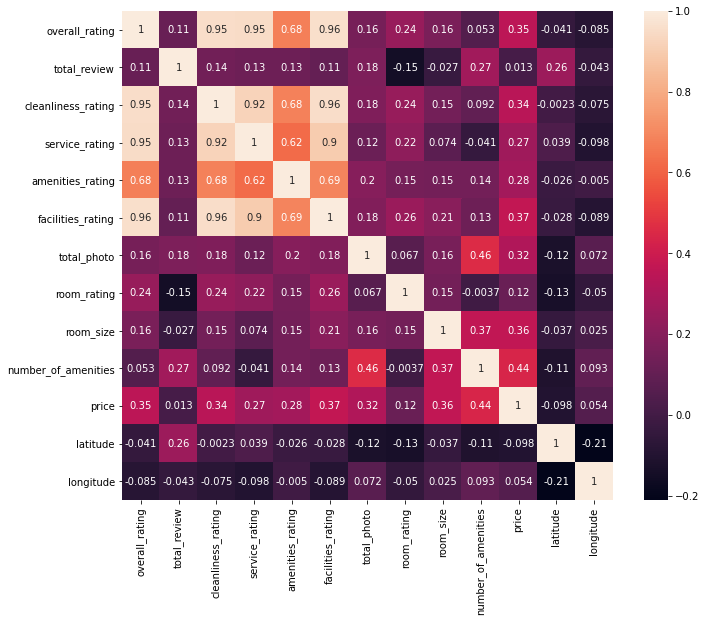

In [74]:
#sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, annot = True)

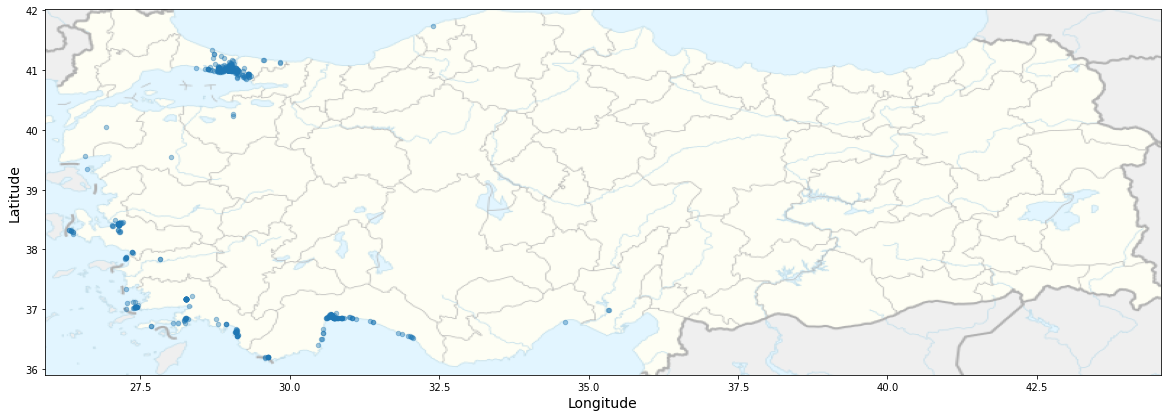

In [75]:
import matplotlib.image as mpimg
turkey_img=mpimg.imread("800px-tr.png")
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,10), alpha=0.4)
plt.imshow(turkey_img, extent=[25.90902 ,  44.5742, 35.9025, 42.02683], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

## Let us find out that hotels are not located in Turkey.

In [76]:
k = df[(df["longitude"] <25) | (df["longitude"] >43)].index
print(k)

Int64Index([], dtype='int64')


#### As you can see, there are two hotels that are not located in Turkey.


In [77]:
df.drop(df[df["longitude"] <25].index, inplace = True)
df.drop(df[df["longitude"] >43].index, inplace = True)

In [78]:
import folium
location = df[['latitude', 'longitude']]
tr_map = folium.Map(location = [38.9025, 35.02683], zoom_start = 6)
for i, (lat, lon) in enumerate(location.values): folium.Marker([lat, lon]).add_to(tr_map)
tr_map

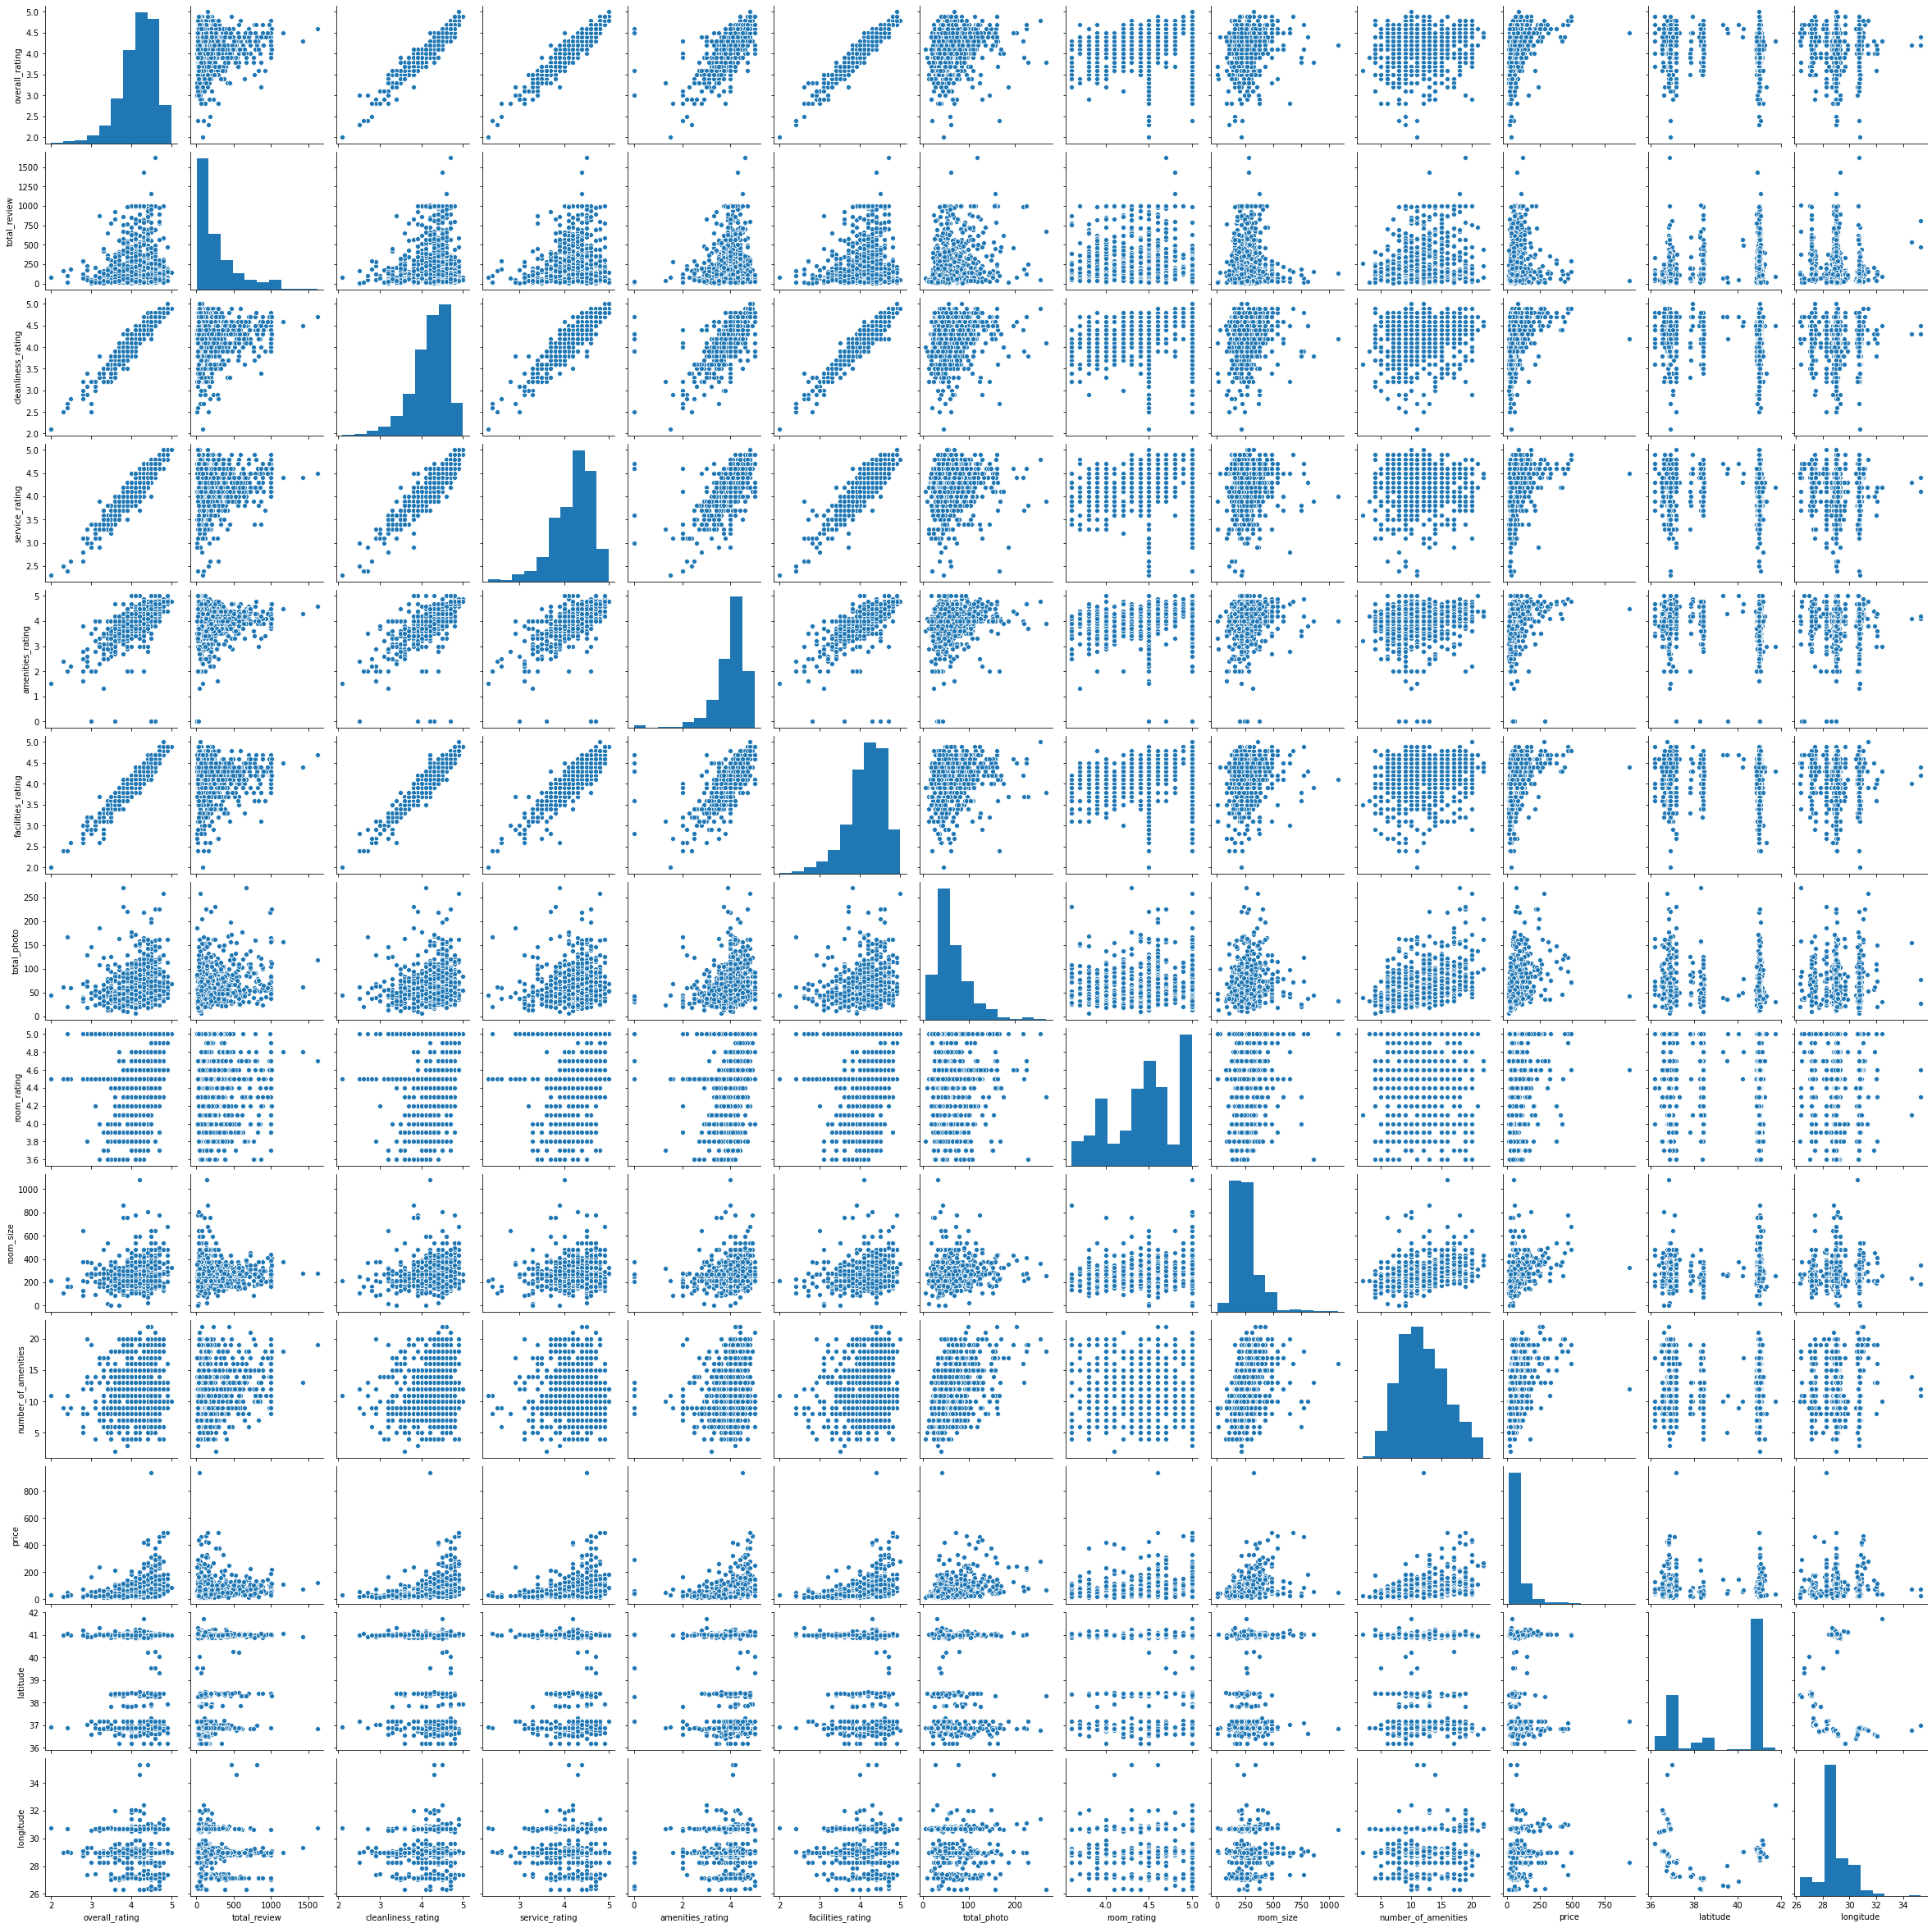

In [79]:
sns.pairplot(df)

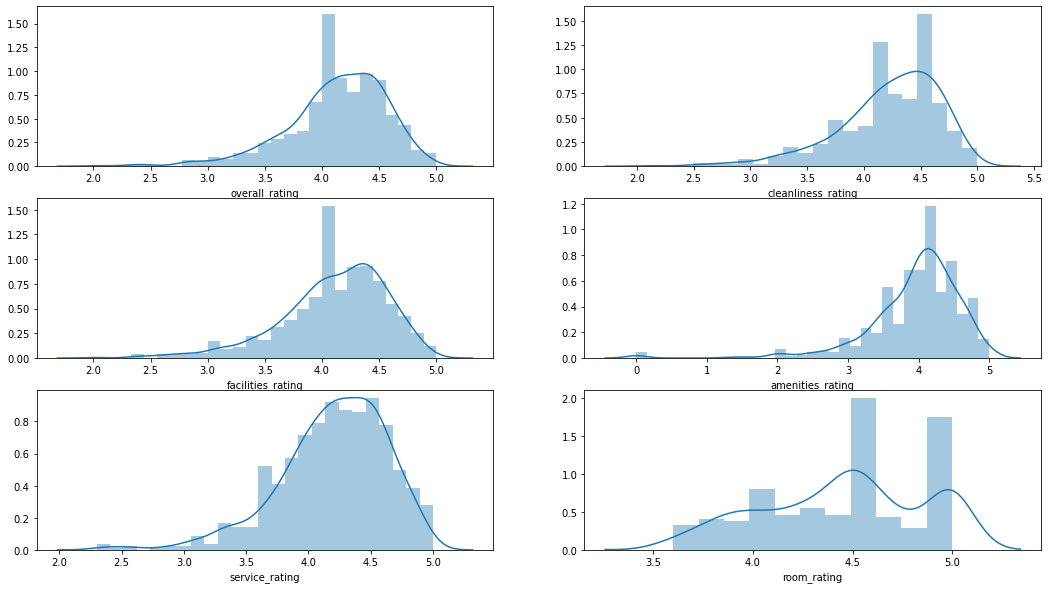

In [80]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
sns.distplot(df["overall_rating"], ax=axes[0, 0])
sns.distplot(df["cleanliness_rating"], ax=axes[0, 1])
sns.distplot(df["facilities_rating"], ax=axes[1, 0])
sns.distplot(df["amenities_rating"], ax=axes[1, 1])
sns.distplot(df["service_rating"], ax=axes[2, 0])
sns.distplot(df["room_rating"], ax=axes[2, 1])

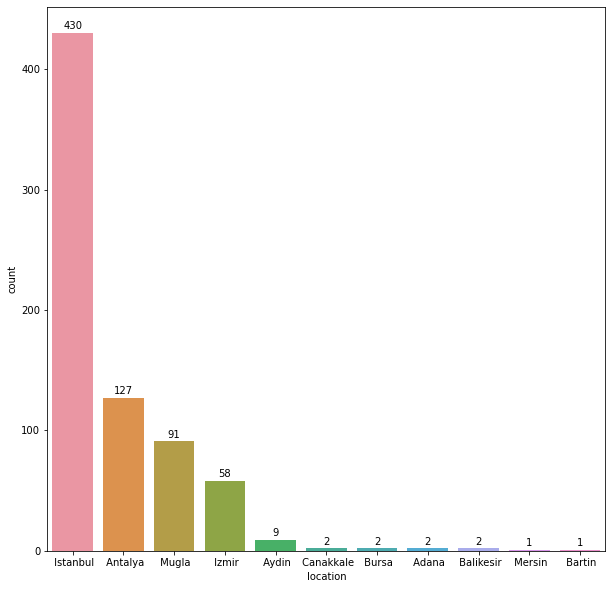

In [81]:
plt.figure(figsize=(10,10)) 
ax = sns.countplot(x="location", data=df, order = df['location'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{}'.format(height),
            ha="center") 


C:\Users\rampg\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


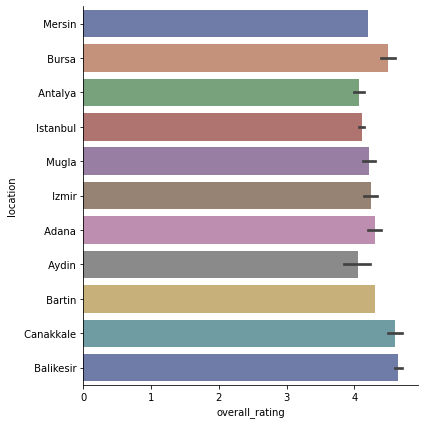

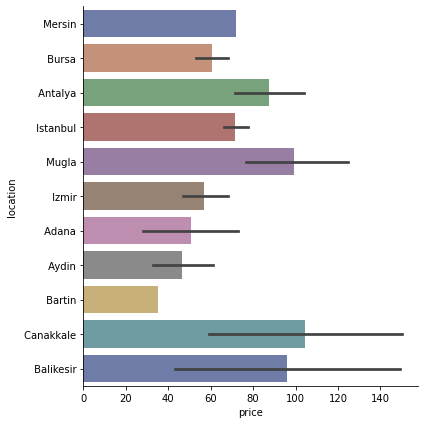

In [82]:
sns.catplot(
    data=df, kind="bar",
    x="overall_rating", y="location", palette="dark", alpha=.6, height=6, ax=axes[0, 0])
sns.catplot(
    data=df, kind="bar",
    x="price", y="location", palette="dark", alpha=.6, height=6, ax=axes[0, 1])

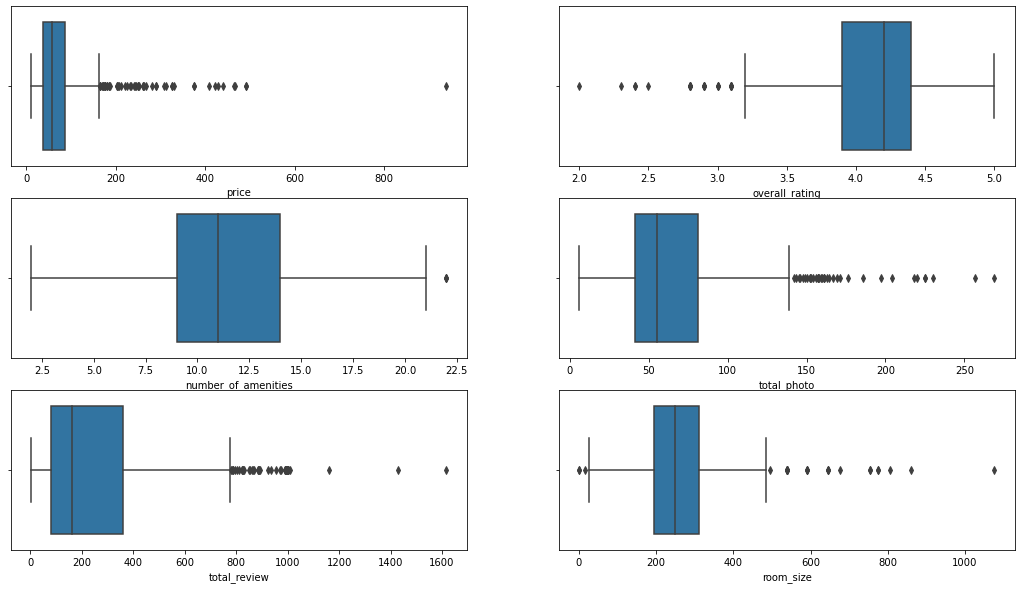

In [83]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
sns.boxplot(df["price"], ax=axes[0, 0])
sns.boxplot(df["overall_rating"], ax=axes[0, 1])
sns.boxplot(df["number_of_amenities"], ax=axes[1, 0])
sns.boxplot(df["total_photo"], ax=axes[1, 1])
sns.boxplot(df["total_review"], ax=axes[2, 0])
sns.boxplot(df["room_size"], ax=axes[2, 1])

## Removing some extreme outliers based on boxplot

In [84]:
from scipy.stats import iqr 
def decide_outliers (data):
    
    # 1.5 iqr rule method
    
    quartiles = np.percentile(data,[25,50,75])

    InterQR = iqr(data)

    lower_iqr = quartiles[0] - (1.5 * InterQR)
    upper_iqr = quartiles[2] + (1.5 * InterQR)

    #Three standard deviation method

    data_mean, data_std = data.mean(), data.std()
    cut_off = 5 * data_std #We want to delete really extreme outliers so we multiply with 5.
    lower_three, upper_three = data_mean - cut_off, data_mean + cut_off
    #print("For three standard deviation method lower is {} and upper is {}" .format(lower_three, upper_three))
    
    return {'lower_iqr': lower_iqr, 'upper_iqr':upper_iqr, 'lower_std':lower_three, 'upper_std':upper_three}

result = {}
num_cols = ["price", "overall_rating", "number_of_amenities","total_photo","total_review","room_size"]
for n in num_cols:
    print(n.upper())
    print()
    print(decide_outliers(df[n]))
    print()

PRICE

{'lower_iqr': -38.0, 'upper_iqr': 162.0, 'lower_std': -297.12230322423613, 'upper_std': 449.82575150009814}

OVERALL_RATING

{'lower_iqr': 3.1499999999999995, 'upper_iqr': 5.150000000000001, 'lower_std': 1.9528864390302592, 'upper_std': 6.311113560969741}

NUMBER_OF_AMENITIES

{'lower_iqr': 1.5, 'upper_iqr': 21.5, 'lower_std': -8.183392389898128, 'upper_std': 31.195806183001576}

TOTAL_PHOTO

{'lower_iqr': -19.0, 'upper_iqr': 141.0, 'lower_std': -121.00559600693359, 'upper_std': 251.70904428279565}

TOTAL_REVIEW

{'lower_iqr': -339.5, 'upper_iqr': 776.5, 'lower_std': -1059.9932900873926, 'upper_std': 1595.0360487080823}

ROOM_SIZE

{'lower_iqr': 17.0, 'upper_iqr': 489.0, 'lower_std': -284.9709522368598, 'upper_std': 817.304745340308}



In [85]:
# iqr rule has more limited range than standard deviation which means if we use iqr rule, more data should be deleted but 
# we want to keep more data. So, we will use three standard deviation method for all.
for n in num_cols:
    i = decide_outliers(df[n])
    k = df[((df[n] > i['upper_std']) | (df[n] < i['lower_std']))].index
    df.drop(k, inplace=True)

### Taking copy of orginal dataset before splitting

In [86]:
df2 = df.copy()

## Split Data

In [204]:
from sklearn.model_selection import train_test_split
num_cols = ["overall_rating", "total_photo", "total_review", "room_size", "number_of_amenities", "latitude", "longitude", ]
X = df2[num_cols]
y = df2["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

## Model Training

In [206]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
scores = {}

In [207]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

scores["linear regression"] = mean_absolute_error(y_test, reg.predict(X_test))

In [208]:
from sklearn.svm import SVR

svr = SVR().fit(X_train, y_train)

scores["Support Vector regression"] = mean_absolute_error(y_test, svr.predict(X_test))

In [209]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(X_train, y_train)

scores["KNeighborsRegressor"] = mean_absolute_error(y_test, knn.predict(X_test))

In [210]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

scores["RandomForestRegressor"] = mean_absolute_error(y_test, clf.predict(X_test))

In [211]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state = 0, n_estimators = 1000).fit(X_train, y_train)

scores["AdaBoostRegressor"] = mean_absolute_error(y_test, ada.predict(X_test))

In [213]:
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(random_state = 0).fit(X_train, y_train)

scores["GradientBoostingRegressor"] = mean_absolute_error(y_test, grad.predict(X_test))

In [214]:
pd.DataFrame(scores.values(), columns = ["Mean Absolute Error"], index = scores.keys())

,Mean Absolute Error
linear regression,25.200026
Support Vector regression,24.698390
KNeighborsRegressor,24.306294
RandomForestRegressor,22.138811
AdaBoostRegressor,32.009249
ExtraTreesRegressor,23.535315
GradientBoostingRegressor,22.386772


### It seems Random Forest Regressor and Gradient Boosting Regressor have more potential to further improvement. 
### So, we keep going with Random Forest Regressor and Gradient Boosting Regressor.

In [236]:
from sklearn.model_selection import RandomizedSearchCV
params = {"n_estimators": [1,5,10,20,30,50,100], "max_depth": [2,4,6,8,10, 20, 30, 40, 50,100, None], "criterion" : ["mae"]}
forest_reg = RandomForestRegressor(random_state = 0)
rand_search = RandomizedSearchCV(estimator=forest_reg, param_distributions = params, n_jobs = -1, scoring = "neg_mean_absolute_error")
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'criterion': ['mae'],
                                        'max_depth': [2, 4, 6, 8, 10, 20, 30,
                                                      40, 50, 100, None],
                                        'n_estimators': [1, 5, 10, 20, 30, 50,
                                                         100]},
                   scoring='neg_mean_absolute_error')

In [237]:
print('Randomized best params {}'
          .format(rand_search.best_params_))
print('Randomized best scores {}'
          .format(-(rand_search.best_score_)))
print('Randomized prediction {}'
          .format(mean_absolute_error(y_test, (rand_search.predict(X_test)))))

Grid best parameter for random forest regressor {'n_estimators': 20, 'max_depth': 4, 'criterion': 'mae'}
Grid best score for random forest regressor 27.659002095947834
Grid best score for random forest regressor 21.254195804195806


In [239]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"loss":["ls","lad","huber","quantile"],'learning_rate': [0.001,0.01,0.1,1,10], 'n_estimators': [1,5,10,50,100,200,300,500], "max_depth":[1,2,4,5,10], "subsample": [.5,.75,1], "min_samples_leaf":[2,3,4,5,10,20,30], "alpha":[0.001,0.01,0.1,0.5,0.9,0.95,0.99]}
grad = GradientBoostingRegressor(random_state = 0)
rand_grad = RandomizedSearchCV(estimator = grad1, param_distributions = param_dist, n_jobs = -1,scoring = "neg_mean_absolute_error", cv = 5)
rand_grad.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9,
                                                  0.95, 0.99],
                                        'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 2, 4, 5, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 10, 20,
                                                             30],
                                        'n_estimators': [1, 5, 10, 50, 100, 200,
                                                         300, 500],
                                        'subsample': [0.5, 0.75, 1]},
                   scoring='neg_mean_ab

In [240]:
print('Randomized best params {}'
          .format(rand_grad.best_params_))
print('Randomized best score {}'
          .format(-(rand_grad.best_score_)))
print('Randomized prediction {}'
          .format(mean_absolute_error(y_test, (rand_grad.predict(X_test)))))

Grid best parameter {'subsample': 1, 'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 2, 'loss': 'lad', 'learning_rate': 0.1, 'alpha': 0.9}
Grid best score 27.15784450628768
Grid best score 19.849074730983276


##### As a result of RandomizedSearchCV, Gradient Boosting Regressor has the best prediction score.

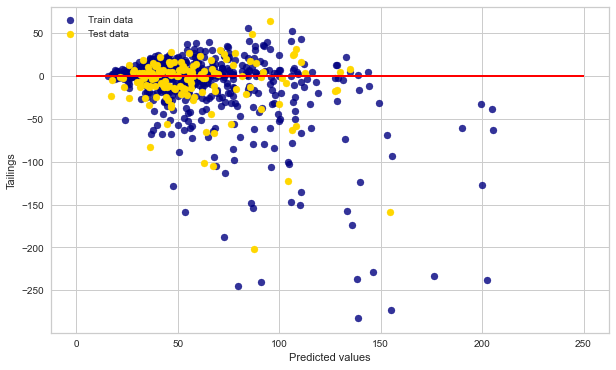

In [294]:
plt.figure(figsize=(10,6))

plt.scatter(rand_grad.predict(X_train),
          rand_grad.predict(X_train) - y_train, c="navy",
          alpha = 0.8, label = 'Train data')

plt.scatter(rand_grad.predict(X_test),
            rand_grad.predict(X_test) - y_test, c="gold",
            label = 'Test data')


plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 250, lw = 2, color = 'red')
plt.show()

#### In conclusion, as a result of RandomizedSearchCV, GradientBoostingRegressor is barely enough to predict hotel price because of small amount of data.
#### We need more data with more features to get better models.